In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn.objects as so

## Procesamiento de datos

In [96]:
ruta_datasets = 'data/'

In [97]:
dataset_sube = pd.read_csv(ruta_datasets+'sube-2023.csv')
dataset_sube_regresion = pd.read_csv(ruta_datasets+'sube-2023-regresion.csv')

### Ejercicio 1

#### a)

Describimos el dataset

In [98]:
dataset_sube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   472291 non-null  object
 1   NOMBRE_EMPRESA   472291 non-null  object
 2   LINEA            472291 non-null  object
 3   AMBA             472291 non-null  object
 4   TIPO_TRANSPORTE  472291 non-null  object
 5   JURISDICCION     469742 non-null  object
 6   PROVINCIA        469720 non-null  object
 7   MUNICIPIO        469720 non-null  object
 8   CANTIDAD         472291 non-null  int64 
 9   DATO_PRELIMINAR  472291 non-null  object
dtypes: int64(1), object(9)
memory usage: 36.0+ MB


Transformamos la columna DIA_TRANSPORTE para que sea reconocida como una fecha

In [99]:
dataset_sube['DIA_TRANSPORTE'] = pd.to_datetime(dataset_sube['DIA_TRANSPORTE'], format='%Y-%m-%d')
dataset_sube

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO
...,...,...,...,...,...,...,...,...,...,...
472286,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL A,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,28,NO
472287,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL B,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,38,NO
472288,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL C,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,54,NO
472289,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL D,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,52,NO


#### b)

##### i.

Creamos la columna FECHA_DIA con el nombre del día de la semana correspondiente a DIA_TRANSPORTE

In [100]:
def obtener_nombre_dia(fecha_dia):
    dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    return dias[fecha_dia.weekday()]

In [101]:
dataset_sube['FECHA_DIA'] = dataset_sube['DIA_TRANSPORTE'].apply(obtener_nombre_dia)
dataset_sube

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Domingo
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Domingo
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Domingo
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Domingo
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Domingo
...,...,...,...,...,...,...,...,...,...,...,...
472286,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL A,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,28,NO,Domingo
472287,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL B,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,38,NO,Domingo
472288,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL C,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,54,NO,Domingo
472289,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL D,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,52,NO,Domingo


##### ii.

Creamos la columna FECHA_ORDINAL donde asignamos el ordinal correspondiente a DIA_TRANSPORTE

In [102]:
dataset_sube['FECHA_ORDINAL'] = dataset_sube['DIA_TRANSPORTE'].dt.day_of_year
dataset_sube

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Domingo,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Domingo,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Domingo,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Domingo,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Domingo,1
...,...,...,...,...,...,...,...,...,...,...,...,...
472286,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL A,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,28,NO,Domingo,365
472287,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL B,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,38,NO,Domingo,365
472288,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL C,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,54,NO,Domingo,365
472289,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL D,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,52,NO,Domingo,365


##### iii.

Creamos la columna FECHA_MES con el mes correspondiente a DIA_TRANSPORTE

In [103]:
dataset_sube['FECHA_MES'] = dataset_sube['DIA_TRANSPORTE'].dt.month
dataset_sube

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Domingo,1,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Domingo,1,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Domingo,1,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Domingo,1,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Domingo,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472286,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL A,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,28,NO,Domingo,365,12
472287,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL B,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,38,NO,Domingo,365,12
472288,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL C,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,54,NO,Domingo,365,12
472289,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL D,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,52,NO,Domingo,365,12


### Ejercicio 2

Creamos un dataframe que contiene solo los datos del AMBA y elimina los datos preliminares

In [104]:
datos_amba = dataset_sube[(dataset_sube['AMBA'] == 'SI') & (dataset_sube['DATO_PRELIMINAR'] == 'NO')]
datos_amba

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Domingo,1,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Domingo,1,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Domingo,1,1
5,2023-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,3067,NO,Domingo,1,1
6,2023-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,332,NO,Domingo,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472214,2023-12-31,AUTOBUSES BUENOS AIRES SRL,LINEA_552_BSAS,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LOMAS DE ZAMORA,4189,NO,Domingo,365,12
472216,2023-12-31,AUTOBUSES BUENOS AIRES SRL,LINEA_553_BSAS,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LOMAS DE ZAMORA,5229,NO,Domingo,365,12
472238,2023-12-31,EMOVA MOVILIDAD S.A. (ex MTV),LINEA_A,SI,SUBTE,NaN,NaN,NaN,30931,NO,Domingo,365,12
472242,2023-12-31,EMOVA MOVILIDAD S.A. (ex MTV),LINEA_B,SI,SUBTE,NaN,NaN,NaN,34714,NO,Domingo,365,12


Acomodamos el orden de las columnas y les corregimos el formato del nombre

In [105]:
datos_amba = datos_amba[['DIA_TRANSPORTE', 'FECHA_DIA', 'FECHA_MES','FECHA_ORDINAL', 'JURISDICCION', 'LINEA','CANTIDAD', 'TIPO_TRANSPORTE']]
datos_amba = datos_amba.rename(columns={"DIA_TRANSPORTE": "fecha", "FECHA_DIA": "fecha_dia","FECHA_MES" : "fecha_mes", "FECHA_ORDINAL":"fecha_ordinal","JURISDICCION": "jurisdiccion", "LINEA":'linea',"CANTIDAD":"pasajeros", "TIPO_TRANSPORTE": "tipo_transporte"})
datos_amba

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Domingo,1,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Domingo,1,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Domingo,1,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Domingo,1,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Domingo,1,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO
...,...,...,...,...,...,...,...,...
472214,2023-12-31,Domingo,12,365,MUNICIPAL,LINEA_552_BSAS,4189,COLECTIVO
472216,2023-12-31,Domingo,12,365,MUNICIPAL,LINEA_553_BSAS,5229,COLECTIVO
472238,2023-12-31,Domingo,12,365,NaN,LINEA_A,30931,SUBTE
472242,2023-12-31,Domingo,12,365,NaN,LINEA_B,34714,SUBTE


Resultado final:

In [106]:
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Domingo,1,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Domingo,1,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Domingo,1,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Domingo,1,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Domingo,1,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


### Ejercicio 3

#### a)

Calculamos la proporcion total de pasajeros por cada medio de transporte en 2023

In [107]:
pasajeros_totales = sum(datos_amba['pasajeros'])
pasajeros_totales

3518818971

In [108]:
pasajeros_por_transporte = datos_amba.groupby('tipo_transporte')['pasajeros'].sum()
pasajeros_por_transporte

tipo_transporte
COLECTIVO    2947520678
SUBTE         239621028
TREN          331677265
Name: pasajeros, dtype: int64

In [119]:
proporcion_pasajeros = ((pasajeros_por_transporte/pasajeros_totales)*100).round(1)
proporcion_pasajeros = proporcion_pasajeros.map(lambda x: f"{x}%")
proporcion_pasajeros

tipo_transporte
COLECTIVO    83.8%
SUBTE         6.8%
TREN          9.4%
Name: pasajeros, dtype: object

#### b)

Creamos un dataset con los datos del subte

In [120]:
datos_subte = datos_amba[datos_amba['tipo_transporte'] == 'SUBTE']
datos_subte = datos_subte[['fecha_mes','linea','pasajeros']]
datos_subte

,fecha_mes,linea,pasajeros
366,1,LIN_PREMETRO,262
662,1,LINEA SUBTE C,20434
663,1,LINEA SUBTE D,13121
664,1,LINEA SUBTE E,7681
665,1,LINEA SUBTE H,7358
...,...,...,...
471805,12,LINEA SUBTE D,27756
471806,12,LINEA SUBTE E,12418
471807,12,LINEA SUBTE H,15254
472238,12,LINEA_A,30931


Agrupamos por mes y linea

In [121]:
datos_subte_mesLinea = datos_subte.groupby(['fecha_mes','linea'])['pasajeros'].sum()
datos_subte_mesLinea

fecha_mes  linea        
1          LINEA SUBTE C    2650875
           LINEA SUBTE D    3357804
           LINEA SUBTE E    1288478
           LINEA SUBTE H    1591342
           LINEA_A          3186254
                             ...   
12         LINEA SUBTE E    1637759
           LINEA SUBTE H    1950958
           LINEA_A          4374190
           LINEA_B          4802180
           LIN_PREMETRO       37417
Name: pasajeros, Length: 84, dtype: int64

Obtenemos el valor máximo, es decir, la tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros

In [123]:
mes_linea_maxPasajeros = pd.DataFrame(datos_subte_mesLinea).idxmax()
mes_linea_maxPasajeros.iloc[0]

(8, 'LINEA_B')

#### c)

Creamos el dataset solo con los días hábiles de la semana

In [124]:
dias_habiles = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']
datos_amba_habiles = datos_amba[datos_amba['fecha_dia'].isin(dias_habiles)]
datos_amba_habiles

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
926,2023-01-02,Lunes,1,2,MUNICIPAL,1,372,COLECTIVO
927,2023-01-02,Lunes,1,2,MUNICIPAL,2B,159,COLECTIVO
931,2023-01-02,Lunes,1,2,PROVINCIAL,BS_AS_LINEA_326,6483,COLECTIVO
933,2023-01-02,Lunes,1,2,MUNICIPAL,BS_AS_LINEA_514,25053,COLECTIVO
934,2023-01-02,Lunes,1,2,MUNICIPAL,BS_AS_LINEA_522,1313,COLECTIVO
...,...,...,...,...,...,...,...,...
469719,2023-12-29,Viernes,12,363,MUNICIPAL,LINEA_552_BSAS,17581,COLECTIVO
469721,2023-12-29,Viernes,12,363,MUNICIPAL,LINEA_553_BSAS,11898,COLECTIVO
469750,2023-12-29,Viernes,12,363,NaN,LINEA_A,158478,SUBTE
469755,2023-12-29,Viernes,12,363,NaN,LINEA_B,170507,SUBTE


Calculamos el desvío estándar para cada día hábil de la semana

In [22]:
desvios = []
for dia_habil in dias_habiles:
    desvio_estandar = datos_amba_habiles[datos_amba_habiles['fecha_dia']==dia_habil]['pasajeros'].std().round(1)
    desvio_dia = (dia_habil, desvio_estandar)
    desvios.append(desvio_dia)
print(desvios)

[('Lunes', 33577.5), ('Martes', 35833.7), ('Miércoles', 35980.8), ('Jueves', 35968.3), ('Viernes', 35059.7)]


Analizamos el día hábil con menor desvío estándar en cantidad de pasajeros

In [23]:
dia_menos_desvio = min(desvios, key=lambda x: x[1])
dia_menos_desvio[0]

'Lunes'

## Analisis exploratorio

### Ejercicio 4

- mediana, media, variacion, desvio estandar, promedio (.mean(), .std(), )
- cantidad de pasajeros por mes para cada transporte
- cantidad de pasajeros por provincia!!!
- cantidad de pasajeros por año (sumar desde 2020)
- cantidad de pasajeros por municipio AMBA
- cantidad de pasajeros LANCHAS

Hice esto por si nos sirve para sacar alguna conclusion, desp borramos:

In [63]:
dataset_sube["TIPO_TRANSPORTE"].unique()

array(['COLECTIVO', 'TREN', 'SUBTE', 'LANCHAS'], dtype=object)

In [64]:
dataset_sube[dataset_sube["TIPO_TRANSPORTE"]=="LANCHAS"]

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
849,2023-01-01,FRANCISCO BUIATTI E HIJOS S.A,LINEA_450_LANCHAS,NO,LANCHAS,PROVINCIAL,BUENOS AIRES,SN,6,NO,Domingo,1,1
850,2023-01-01,INTERISLEÑA S A C E I,LINEA_451_LANCHAS,NO,LANCHAS,PROVINCIAL,BUENOS AIRES,SN,2,NO,Domingo,1,1
851,2023-01-01,INTERISLEÑA S A C E I,LINEA_452_LANCHAS,NO,LANCHAS,PROVINCIAL,BUENOS AIRES,SN,14,NO,Domingo,1,1
852,2023-01-01,LINEAS DELTA ARGENTINO S.R.L.,LINEA_453_LANCHAS,NO,LANCHAS,PROVINCIAL,BUENOS AIRES,SN,1,NO,Domingo,1,1
853,2023-01-01,EMPRESA EL LEON S R L,LINEA_454_LANCHAS,NO,LANCHAS,PROVINCIAL,BUENOS AIRES,SN,7,NO,Domingo,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472150,2023-12-31,FRANCISCO BUIATTI E HIJOS S.A,LINEA_450_LANCHAS,NO,LANCHAS,PROVINCIAL,BUENOS AIRES,SN,300,NO,Domingo,365,12
472151,2023-12-31,INTERISLEÑA S A C E I,LINEA_452_451_LANCHAS,NO,LANCHAS,PROVINCIAL,BUENOS AIRES,SN,682,NO,Domingo,365,12
472152,2023-12-31,LINEAS DELTA ARGENTINO S.R.L.,LINEA_453_LANCHAS,NO,LANCHAS,PROVINCIAL,BUENOS AIRES,SN,117,NO,Domingo,365,12
472153,2023-12-31,EMPRESA EL LEON S R L,LINEA_454_LANCHAS,NO,LANCHAS,PROVINCIAL,BUENOS AIRES,SN,16,NO,Domingo,365,12


In [28]:
dataset_sube["PROVINCIA"].unique()

array(['BUENOS AIRES', 'JN', 'CHUBUT', nan, 'SANTA FE', 'ENTRE RÍOS',
       'LA PAMPA', 'MENDOZA', 'RÍO NEGRO', 'TIERRA DEL FUEGO', 'CHACO',
       'JUJUY', 'NEUQUÉN', 'FORMOSA', 'CORRIENTES', 'CATAMARCA',
       'SAN JUAN', 'SAN LUIS', 'CORDOBA', 'SANTA CRUZ',
       'SANTIAGO DEL ESTERO'], dtype=object)

In [59]:
datasetProvinciaEsNulo = dataset_sube[dataset_sube["PROVINCIA"].isnull()]
datasetProvinciaEsNulo

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
366,2023-01-01,EMOVA MOVILIDAD S.A. (ex MTV),LIN_PREMETRO,SI,SUBTE,NaN,NaN,NaN,262,NO,Domingo,1,1
662,2023-01-01,EMOVA MOVILIDAD S.A. (ex MTV),LINEA SUBTE C,SI,SUBTE,NaN,NaN,NaN,20434,NO,Domingo,1,1
663,2023-01-01,EMOVA MOVILIDAD S.A. (ex MTV),LINEA SUBTE D,SI,SUBTE,NaN,NaN,NaN,13121,NO,Domingo,1,1
664,2023-01-01,EMOVA MOVILIDAD S.A. (ex MTV),LINEA SUBTE E,SI,SUBTE,NaN,NaN,NaN,7681,NO,Domingo,1,1
665,2023-01-01,EMOVA MOVILIDAD S.A. (ex MTV),LINEA SUBTE H,SI,SUBTE,NaN,NaN,NaN,7358,NO,Domingo,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471805,2023-12-31,EMOVA MOVILIDAD S.A. (ex MTV),LINEA SUBTE D,SI,SUBTE,NaN,NaN,NaN,27756,NO,Domingo,365,12
471806,2023-12-31,EMOVA MOVILIDAD S.A. (ex MTV),LINEA SUBTE E,SI,SUBTE,NaN,NaN,NaN,12418,NO,Domingo,365,12
471807,2023-12-31,EMOVA MOVILIDAD S.A. (ex MTV),LINEA SUBTE H,SI,SUBTE,NaN,NaN,NaN,15254,NO,Domingo,365,12
472238,2023-12-31,EMOVA MOVILIDAD S.A. (ex MTV),LINEA_A,SI,SUBTE,NaN,NaN,NaN,30931,NO,Domingo,365,12


In [61]:
datasetProvinciaEsNulo["TIPO_TRANSPORTE"].unique()

array(['SUBTE', 'COLECTIVO'], dtype=object)

In [62]:
datasetProvinciaEsNulo[datasetProvinciaEsNulo["TIPO_TRANSPORTE"]=="COLECTIVO"]

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
309765,2023-09-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,41997,NO,Viernes,244,9
311165,2023-09-02,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,21416,NO,Sábado,245,9
312422,2023-09-03,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,5474,NO,Domingo,246,9
313577,2023-09-04,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,39075,NO,Lunes,247,9
314971,2023-09-05,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,42641,NO,Martes,248,9
316366,2023-09-06,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,36831,NO,Miércoles,249,9
317765,2023-09-07,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,31442,NO,Jueves,250,9
319158,2023-09-08,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,43143,NO,Viernes,251,9
320557,2023-09-09,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,27350,NO,Sábado,252,9
321807,2023-09-10,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,NaN,NaN,11836,NO,Domingo,253,9


##### Gráfico 1

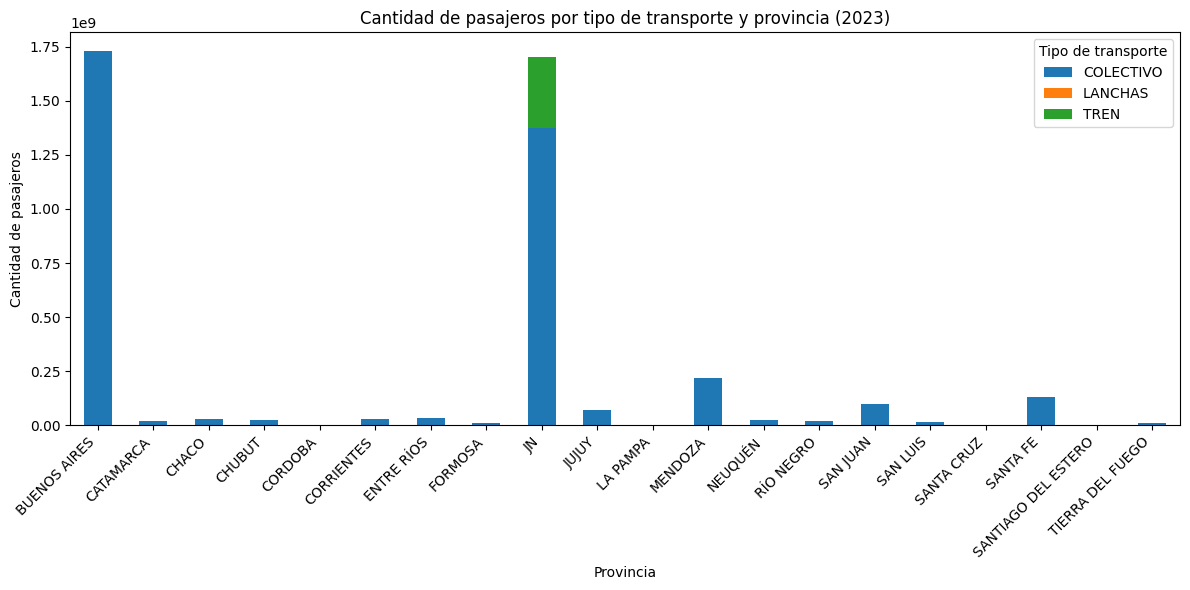

In [165]:

# Agrupar por provincia y tipo de transporte, y sumar la cantidad de pasajeros
datos_agrupados = dataset_sube.groupby(['PROVINCIA', 'TIPO_TRANSPORTE'])['CANTIDAD'].sum().unstack()

# Crear el gráfico de barras apiladas
datos_agrupados.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cantidad de pasajeros por tipo de transporte y provincia (2023)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de pasajeros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de transporte')
plt.tight_layout()
plt.show()

In [166]:
print(datos_agrupados)

TIPO_TRANSPORTE         COLECTIVO   LANCHAS         TREN
PROVINCIA                                               
BUENOS AIRES         1.730129e+09  205543.0          NaN
CATAMARCA            1.940586e+07       NaN          NaN
CHACO                3.089504e+07       NaN          NaN
CHUBUT               2.197381e+07       NaN          NaN
CORDOBA              3.603100e+04       NaN          NaN
CORRIENTES           2.889582e+07       NaN          NaN
ENTRE RÍOS           3.475101e+07       NaN          NaN
FORMOSA              1.022766e+07       NaN          NaN
JN                   1.372270e+09       NaN  331984197.0
JUJUY                6.818374e+07       NaN          NaN
LA PAMPA             3.218221e+06       NaN          NaN
MENDOZA              2.185235e+08       NaN          NaN
NEUQUÉN              2.614964e+07       NaN          NaN
RÍO NEGRO            1.831678e+07       NaN          NaN
SAN JUAN             9.603199e+07       NaN          NaN
SAN LUIS             1.638076e+

## Modelado

### Ejercicio 5